# Diamond Price Prediction
### Author : Farbodkhm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
import warnings
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from xgboost import XGBClassifier, XGBRFRegressor, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, IsolationForest, RandomTreesEmbedding, HistGradientBoostingRegressor
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, r2_score, explained_variance_score, max_error, mean_squared_error, mean_absolute_percentage_error, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score, mean_absolute_error
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.799444,0.475173,0.2,0.40,0.70,1.04,5.01
depth,50000.0,61.753006,1.431088,43.0,61.00,61.80,62.50,79.00
table,50000.0,57.457830,2.232092,43.0,56.00,57.00,59.00,95.00
price,50000.0,3944.805440,3997.938105,326.0,951.00,2410.00,5351.00,18823.00
x,50000.0,5.734403,1.123077,0.0,4.71,5.70,6.54,10.74
y,50000.0,5.737956,1.145579,0.0,4.72,5.71,6.54,58.90
z,50000.0,3.541056,0.707065,0.0,2.91,3.53,4.04,31.80


## Cleaning Data

In [6]:
df.duplicated().sum()

126

In [7]:
df.shape

(50000, 10)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(49874, 10)

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Checking if data has 0 values for x,y,z

In [11]:
df.index[df['z'] <= 0]

Int64Index([ 2046,  4422,  5038,  9370, 10310, 11038, 12568, 14731, 22598,
            22721, 24222, 24336, 25439, 25509, 25726, 45910, 47724],
           dtype='int64')

In [12]:
df.index[df['x'] <= 0]

Int64Index([10310, 11038, 14731, 22721, 24336, 25439, 45910], dtype='int64')

In [13]:
df.index[df['y'] <= 0]

Int64Index([11038, 14731, 22721, 24336, 25439, 45910], dtype='int64')

In [14]:
df.index[df['price'] <= 0]

Int64Index([], dtype='int64')

In [15]:
df = df.loc[~(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))]

In [16]:
df.shape

(49857, 10)

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Analyzing

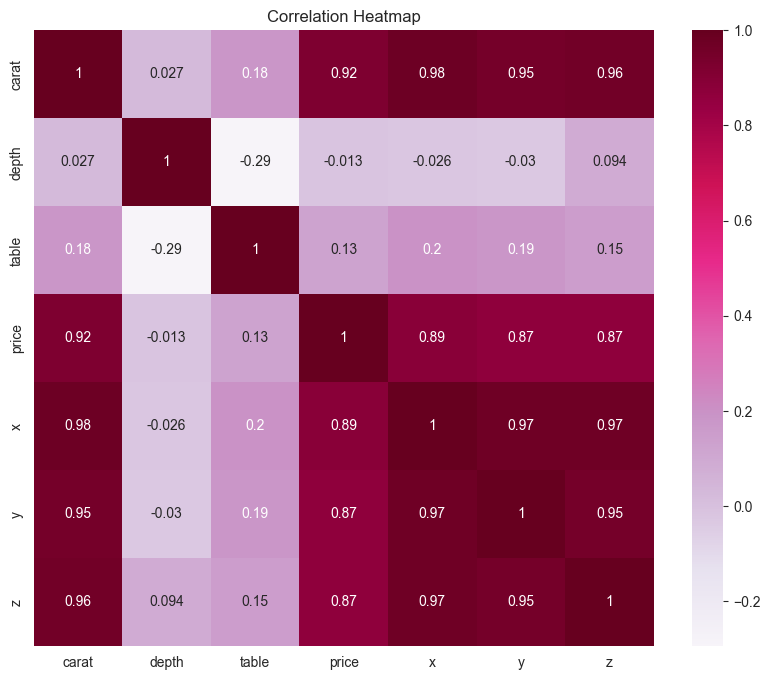

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="PuRd")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='x', ylabel='price'>

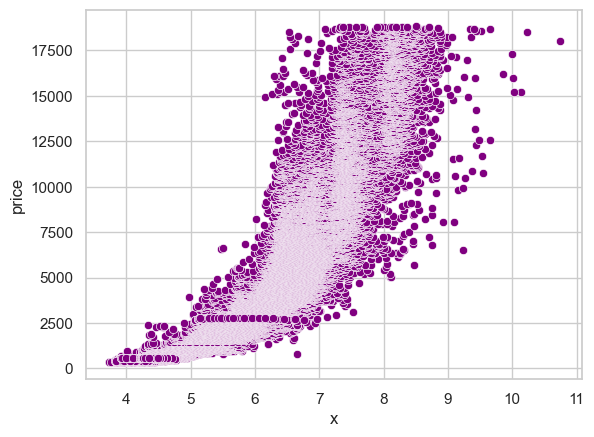

In [19]:
ax = sns.set(style='whitegrid')
sns.scatterplot(data=df, y='price', x='x', color='Purple')

<Axes: xlabel='y', ylabel='price'>

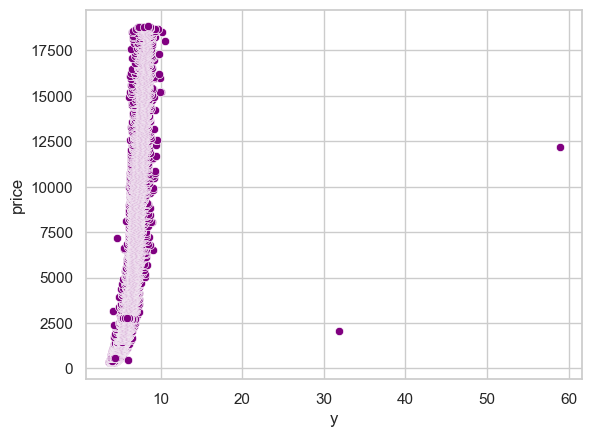

In [20]:
sns.scatterplot(data=df, y='price', x='y', color='Purple')

<Axes: xlabel='z', ylabel='price'>

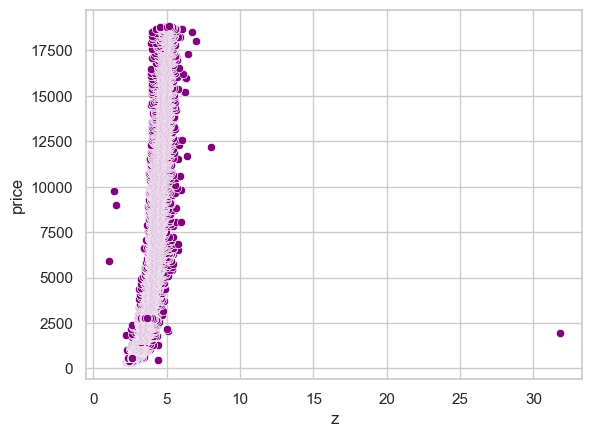

In [21]:
sns.scatterplot(data=df, y='price', x='z', color='Purple')

<Axes: xlabel='carat', ylabel='price'>

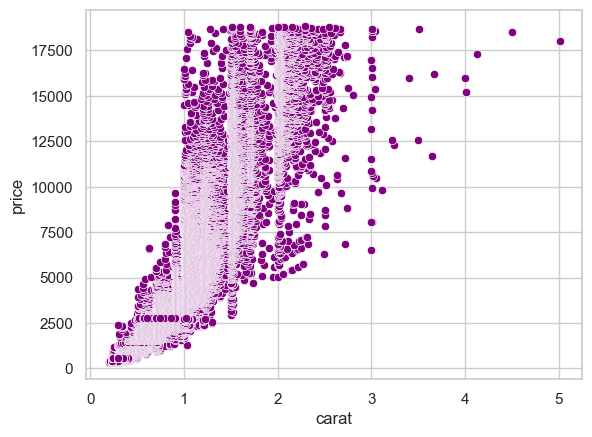

In [22]:
sns.scatterplot(data=df, y='price', x='carat', color='Purple')

<Axes: xlabel='depth', ylabel='price'>

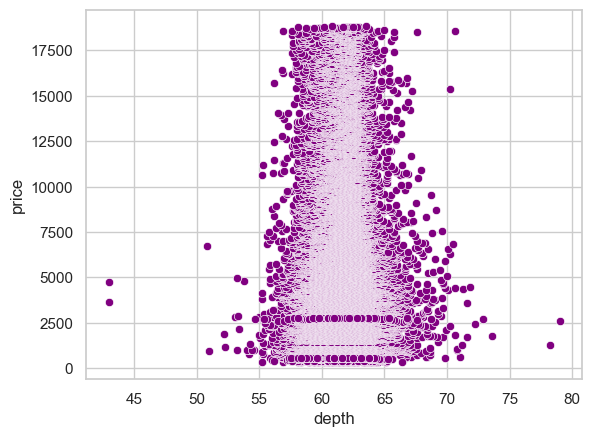

In [23]:
sns.scatterplot(data=df, y='price', x='depth', color='Purple')

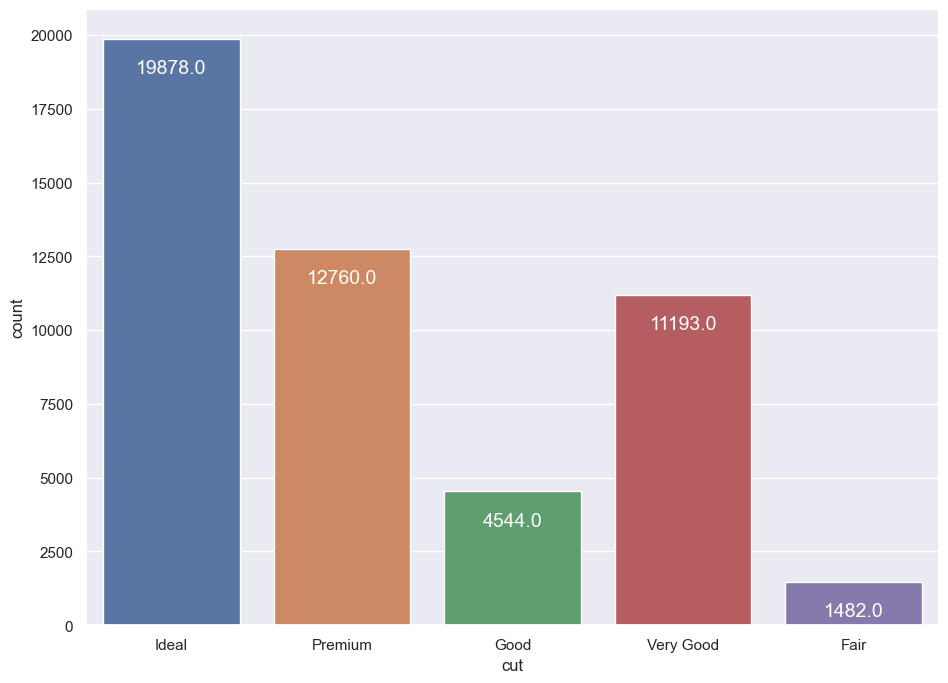

In [24]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.countplot(x='cut', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

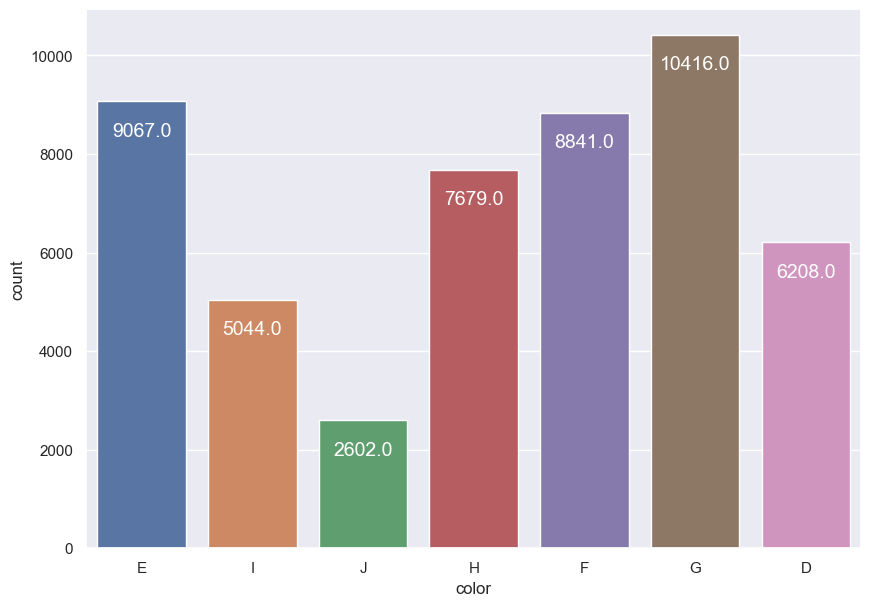

In [25]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x='color', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

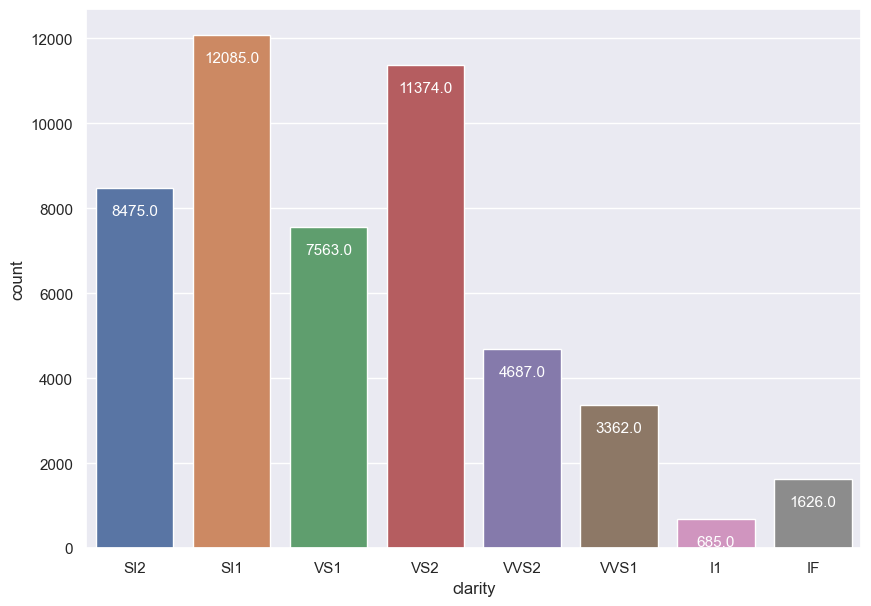

In [26]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x='clarity', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)

#### It seems x,y,z are so correlated, so I will combine them together!

In [27]:
df['xyz'] = df['x']*df['y']*df['z']
df.drop(columns=['x','y','z'], axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
49996,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
49998,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


## Encoding

In [28]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [29]:
clarityEncoding = {
    'I1' : 0,
    'SI2' : 1,
    'SI1' : 2,
    'VS2' : 3,
    'VS1' : 4,
    'VVS2' : 5,
    'VVS1' : 6,
    'IF' : 7
}

df['clarity'].replace(clarityEncoding, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,1,61.5,55.0,326,38.202030
1,0.21,Premium,E,2,59.8,61.0,326,34.505856
2,0.23,Good,E,4,56.9,65.0,327,38.076885
3,0.29,Premium,I,3,62.4,58.0,334,46.724580
4,0.31,Good,J,1,63.3,58.0,335,51.917250


In [30]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [31]:
colorEncoding = {
    'J' : 0,
    'I' : 1,
    'H' : 2,
    'G' : 3,
    'F' : 4,
    'E' : 5,
    'D' : 6
}
df['color'].replace(colorEncoding, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,5,1,61.5,55.0,326,38.202030
1,0.21,Premium,5,2,59.8,61.0,326,34.505856
2,0.23,Good,5,4,56.9,65.0,327,38.076885
3,0.29,Premium,1,3,62.4,58.0,334,46.724580
4,0.31,Good,0,1,63.3,58.0,335,51.917250


In [32]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [33]:
cutEncoding = {
    'Fair' : 0,
    'Good' : 1,
    'Very Good' : 2,
    'Premium' : 3,
    'Ideal' : 4
}
df['cut'].replace(cutEncoding, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,4,5,1,61.5,55.0,326,38.202030
1,0.21,3,5,2,59.8,61.0,326,34.505856
2,0.23,1,5,4,56.9,65.0,327,38.076885
3,0.29,3,1,3,62.4,58.0,334,46.724580
4,0.31,1,0,1,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
49995,0.72,4,6,2,60.8,57.0,2757,115.920000
49996,0.72,1,6,2,63.1,55.0,2757,118.110175
49997,0.70,2,6,2,62.8,60.0,2757,114.449728
49998,0.86,3,2,1,61.0,58.0,2757,140.766120


## Split Train & Test Data

In [34]:
y = df['price'].values.reshape(-1, 1)
print(y)

[[ 326]
 [ 326]
 [ 327]
 ...
 [2757]
 [2757]
 [2757]]


In [35]:
x = df.drop(columns=['price'], axis=1).values
print(x)

[[  0.23       4.         5.       ...  61.5       55.        38.20203 ]
 [  0.21       3.         5.       ...  59.8       61.        34.505856]
 [  0.23       1.         5.       ...  56.9       65.        38.076885]
 ...
 [  0.7        2.         6.       ...  62.8       60.       114.449728]
 [  0.86       3.         2.       ...  61.        58.       140.76612 ]
 [  0.75       4.         6.       ...  62.2       55.       124.568444]]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [37]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_test

array([[ 0.27580107, -1.70577872,  1.52755832, ..., -0.24730041,
         2.48845441,  0.24099876],
       [ 2.54949169,  0.98370544, -1.99798423, ...,  0.6669575 ,
        -0.65509785,  2.50286376],
       [-1.00841307,  0.98370544,  0.35237747, ...,  0.45597491,
        -0.20601895, -0.99333217],
       ...,
       [-0.46104311, -0.809284  ,  0.9399679 , ...,  1.22957776,
         1.14121773, -0.4776352 ],
       [ 0.212643  , -1.70577872, -0.82280338, ...,  1.44056036,
        -0.20601895,  0.18542882],
       [-0.58735926,  0.08721072, -0.23521296, ...,  0.10433725,
         1.59029663, -0.59557819]])

In [38]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)
y_test

array([[ 0.05479164],
       [ 2.06573919],
       [-0.8251854 ],
       ...,
       [-0.67018944],
       [-0.18620207],
       [-0.44819523]])

## Training the Models!

In [39]:
def Evaluation(y_test, y_pred):
    tabel_parameter = PrettyTable(['Metric', 'Value'])
    tabel_parameter.add_row(['R^2', '{:.10}'.format(r2_score(y_test, y_pred))])
    tabel_parameter.add_row(['Max Error', '{:.10}'.format(max_error(y_test, y_pred))])
    tabel_parameter.add_row(['Mean Absolute Error', '{:.10}'.format(mean_absolute_error(y_test, y_pred))])
    tabel_parameter.add_row(['Mean Squared Error', '{:.10}'.format(mean_squared_error(y_test, y_pred))])
    print(tabel_parameter)

In [40]:
# XGBoost Regression
xb = XGBRegressor(n_estimators=200)
xb.fit(x_train, y_train)
y_pred = xb.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.9804297943 |
|      Max Error      |  1.637256807  |
| Mean Absolute Error | 0.07069298155 |
|  Mean Squared Error | 0.01931625921 |
+---------------------+---------------+


In [41]:
# Random Forest Regression
rfRegressor = RandomForestRegressor(n_estimators=200, random_state=0)
rfRegressor.fit(x_train, y_train)
y_pred = rfRegressor.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.9801545259 |
|      Max Error      |  1.468561366  |
| Mean Absolute Error |  0.0708136572 |
|  Mean Squared Error | 0.01958795567 |
+---------------------+---------------+


In [42]:
# Extra Trees Regression
etRegressor = ExtraTreesRegressor(n_estimators=200, random_state=0)
etRegressor.fit(x_train, y_train)
y_pred = etRegressor.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.9800599882 |
|      Max Error      |  1.475057771  |
| Mean Absolute Error | 0.07169138006 |
|  Mean Squared Error | 0.01968126661 |
+---------------------+---------------+


In [43]:
# Bagging Regressor
baggingRegressor = BaggingRegressor(n_estimators=100, random_state=0)
baggingRegressor.fit(x_train, y_train)
y_pred = baggingRegressor.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.980074294  |
|      Max Error      |  1.482820735  |
| Mean Absolute Error | 0.07104358276 |
|  Mean Squared Error | 0.01966714642 |
+---------------------+---------------+


In [44]:
# Hist Gradient Boosting
hgRegressor = HistGradientBoostingRegressor(random_state=0)
hgRegressor.fit(x_train, y_train)
y_pred = hgRegressor.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.9803029702 |
|      Max Error      |  2.114224998  |
| Mean Absolute Error | 0.07156440699 |
|  Mean Squared Error |  0.0194414376 |
+---------------------+---------------+


In [45]:
xx = LGBMRegressor(random_state=0)
xx.fit(x_train, y_train)
y_pred = xx.predict(x_test)
# Evaluating
Evaluation(y_test, y_pred)

+---------------------+---------------+
|        Metric       |     Value     |
+---------------------+---------------+
|         R^2         |  0.9809498715 |
|      Max Error      |  1.807998965  |
| Mean Absolute Error | 0.07155641897 |
|  Mean Squared Error | 0.01880293058 |
+---------------------+---------------+
